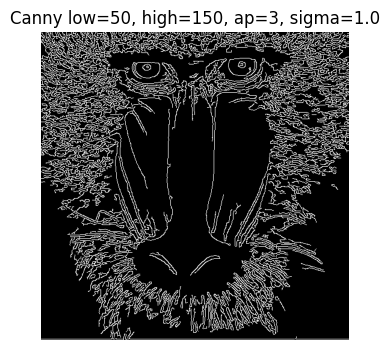

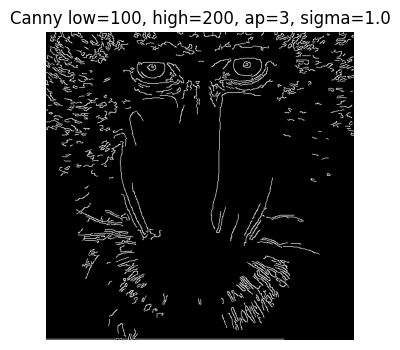

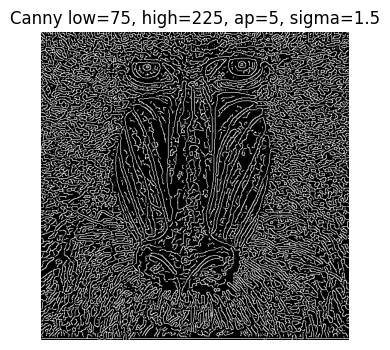

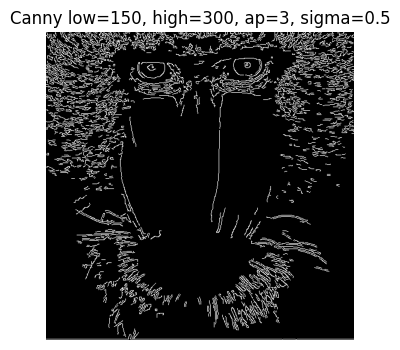

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_gray(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img.astype(np.float32) / 255.0

# converts to black and white and diveds pixel value by 255 to get the values in the range of 0-1.

def gaussian_blur(img, sigma):
    if sigma <= 0:
        return img
    k = int(6*sigma + 1)
    if k % 2 == 0: k += 1
    return cv2.GaussianBlur(img, (k, k), sigma)

# applies gaussian blur to the image, in order to soften it and remove noise 

def run_canny(img, low, high, aperture, sigma_pre):
    sm = gaussian_blur(img, sigma_pre)
    sm_uint8 = (sm * 255).astype(np.uint8)
    edges = cv2.Canny(sm_uint8, low, high, apertureSize=aperture, L2gradient=True)
    return edges.astype(np.float32) / 255.0

#this function runs the canny algorithm with selected thresholds (parameters) and outputs an image of edges extracted from the original image 

def show(img, title):
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
    plt.show()

def main():
    img = load_gray("mandrill.jpg")
    params = [
        (50, 150, 3, 1.0),
        (100, 200, 3, 1.0),
        (75, 225, 5, 1.5),
        (150, 300, 3, 0.5)
    ]
# different sets of tuning options (parameters) for Canny:

    for (low, high, ap, sig) in params:
        edges = run_canny(img, low, high, ap, sig)
        title = f"Canny low={low}, high={high}, ap={ap}, sigma={sig}"
        show(edges, title)

# loops through each set of paramaters and outputs the corresponding image 

if __name__ == "__main__":
    main()
